In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [102]:
data = pd.read_csv("Hotel Reservations.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [104]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [105]:
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0) 
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

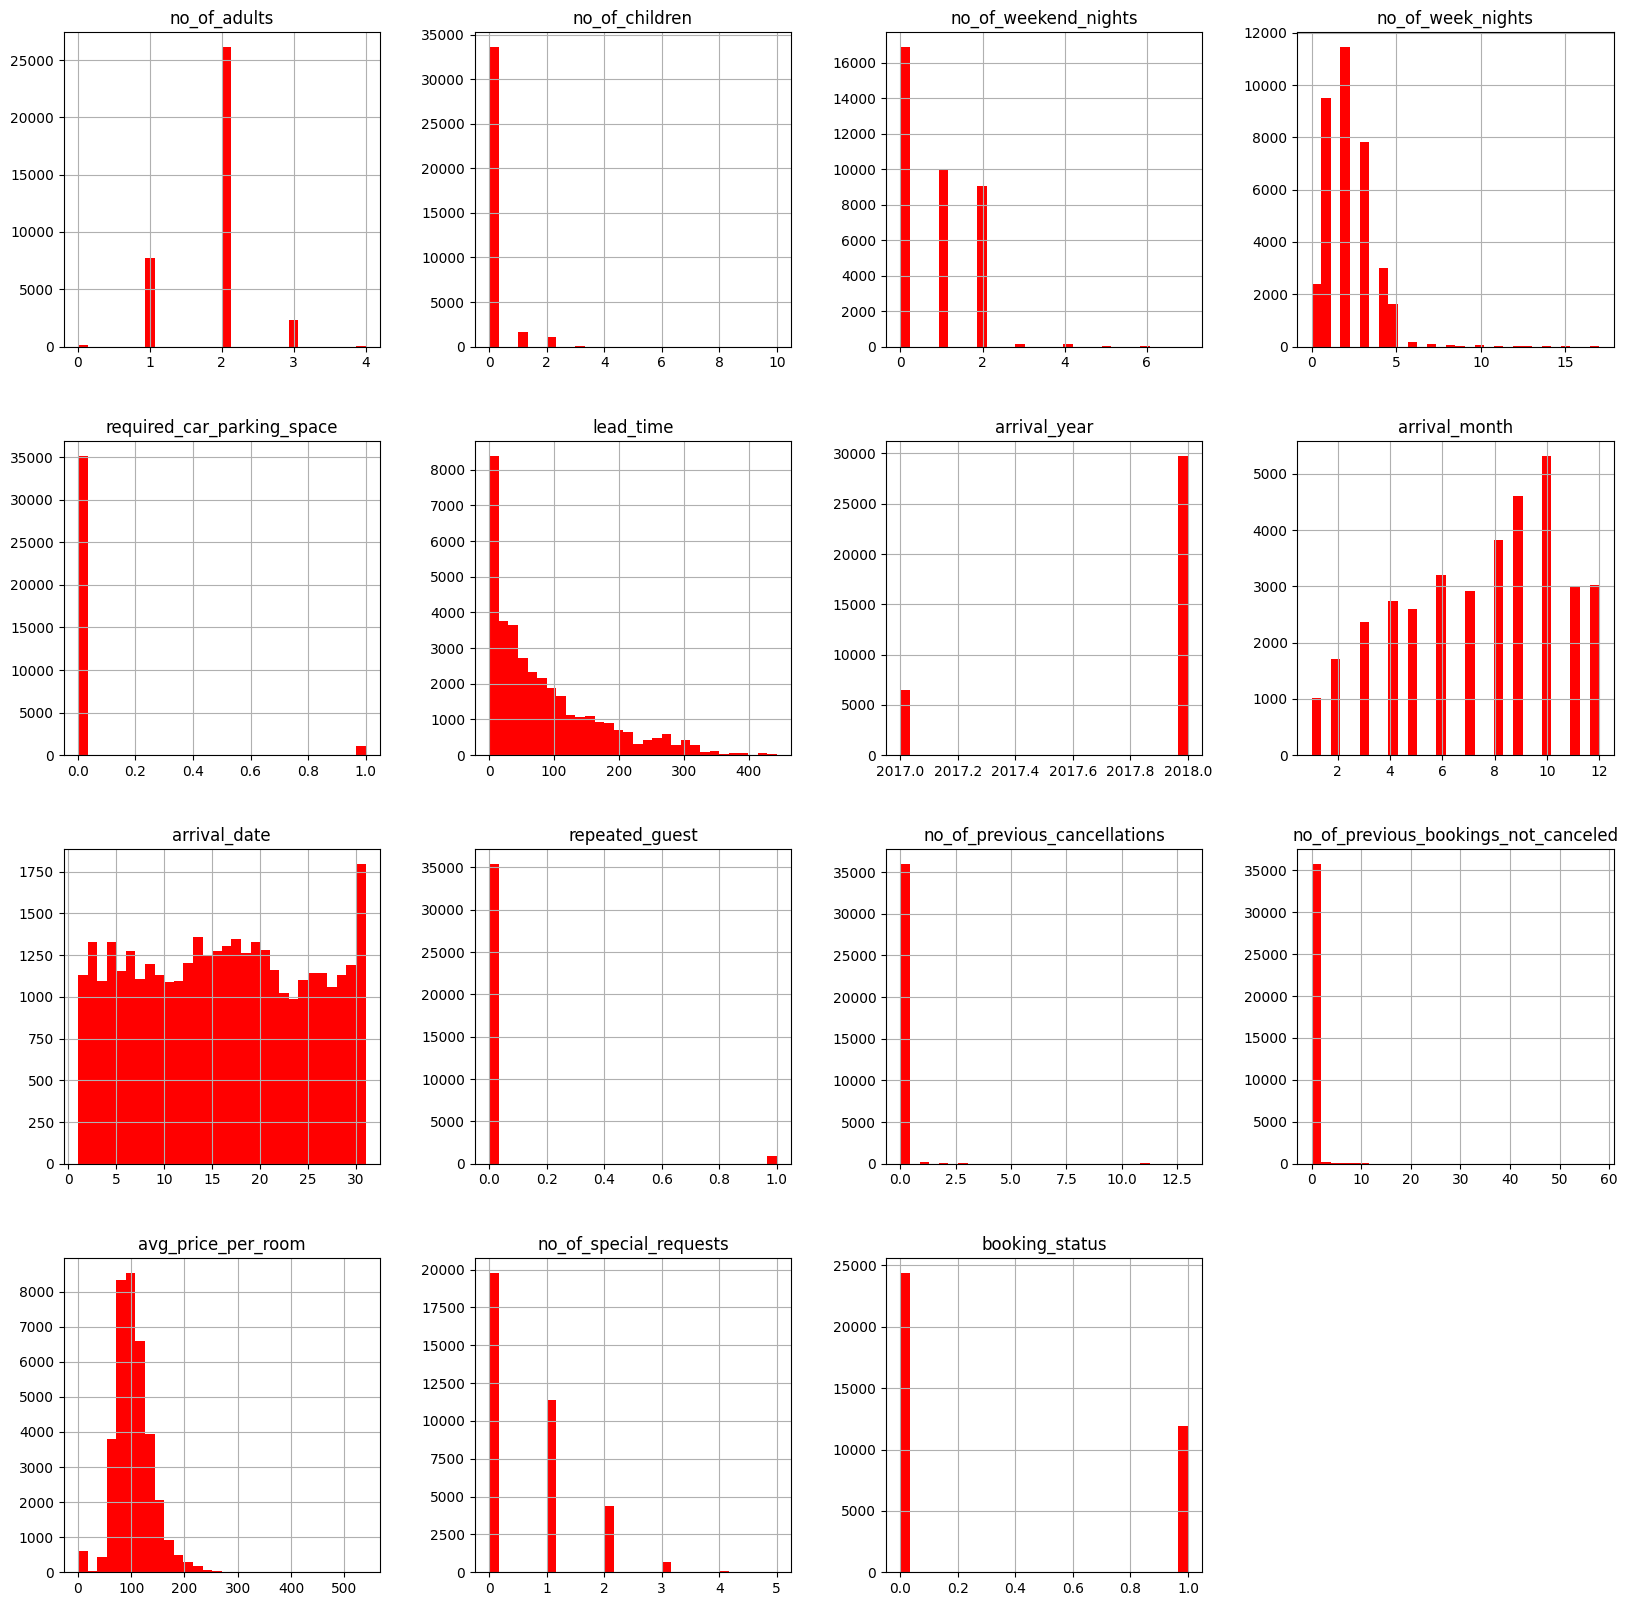

In [106]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [107]:
df = data['lead_time']
z_scores = (df - df.mean()) / df.std()
data['lead_time'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_adults']
z_scores = (df - df.mean()) / df.std()
data['no_of_adults'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_children']
z_scores = (df - df.mean()) / df.std()
data['no_of_children'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_week_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_week_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_weekend_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_weekend_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_cancellations']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_cancellations'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_bookings_not_canceled']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_bookings_not_canceled'] = df[(np.abs(z_scores) < 3)]

df = data['avg_price_per_room']
z_scores = (df - df.mean()) / df.std()
data['avg_price_per_room'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_special_requests']
z_scores = (df - df.mean()) / df.std()
data['no_of_special_requests'] = df[(np.abs(z_scores) < 3)]


In [108]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10,2,Offline,0,0.0,0.0,65.00,0.0,0
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0.0,0.0,106.68,1.0,0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0.0,0.0,60.00,0.0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0.0,0.0,100.00,0.0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,INN36271,3.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 4,85.0,2018,8,3,Online,0,0.0,0.0,167.80,1.0,0
33340,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0,Room_Type 1,228.0,2018,10,17,Online,0,0.0,0.0,90.95,2.0,1
33341,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 1,148.0,2018,7,1,Online,0,0.0,0.0,98.39,2.0,0
33342,INN36274,2.0,0.0,0.0,3.0,Not Selected,0,Room_Type 1,63.0,2018,4,21,Online,0,0.0,0.0,94.50,0.0,1


<Axes: >

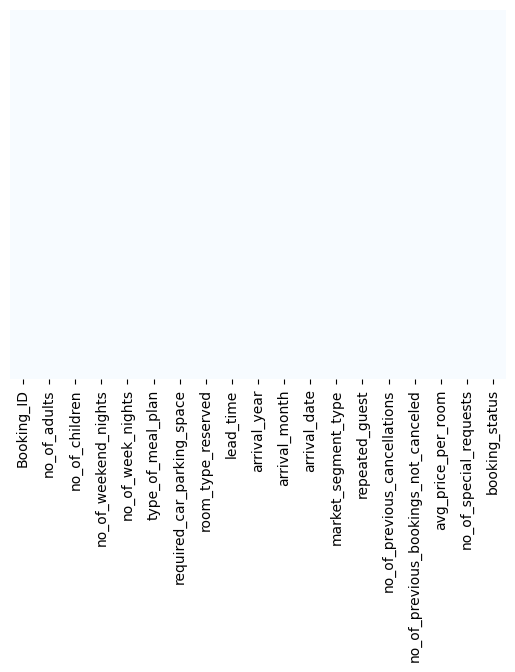

In [109]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

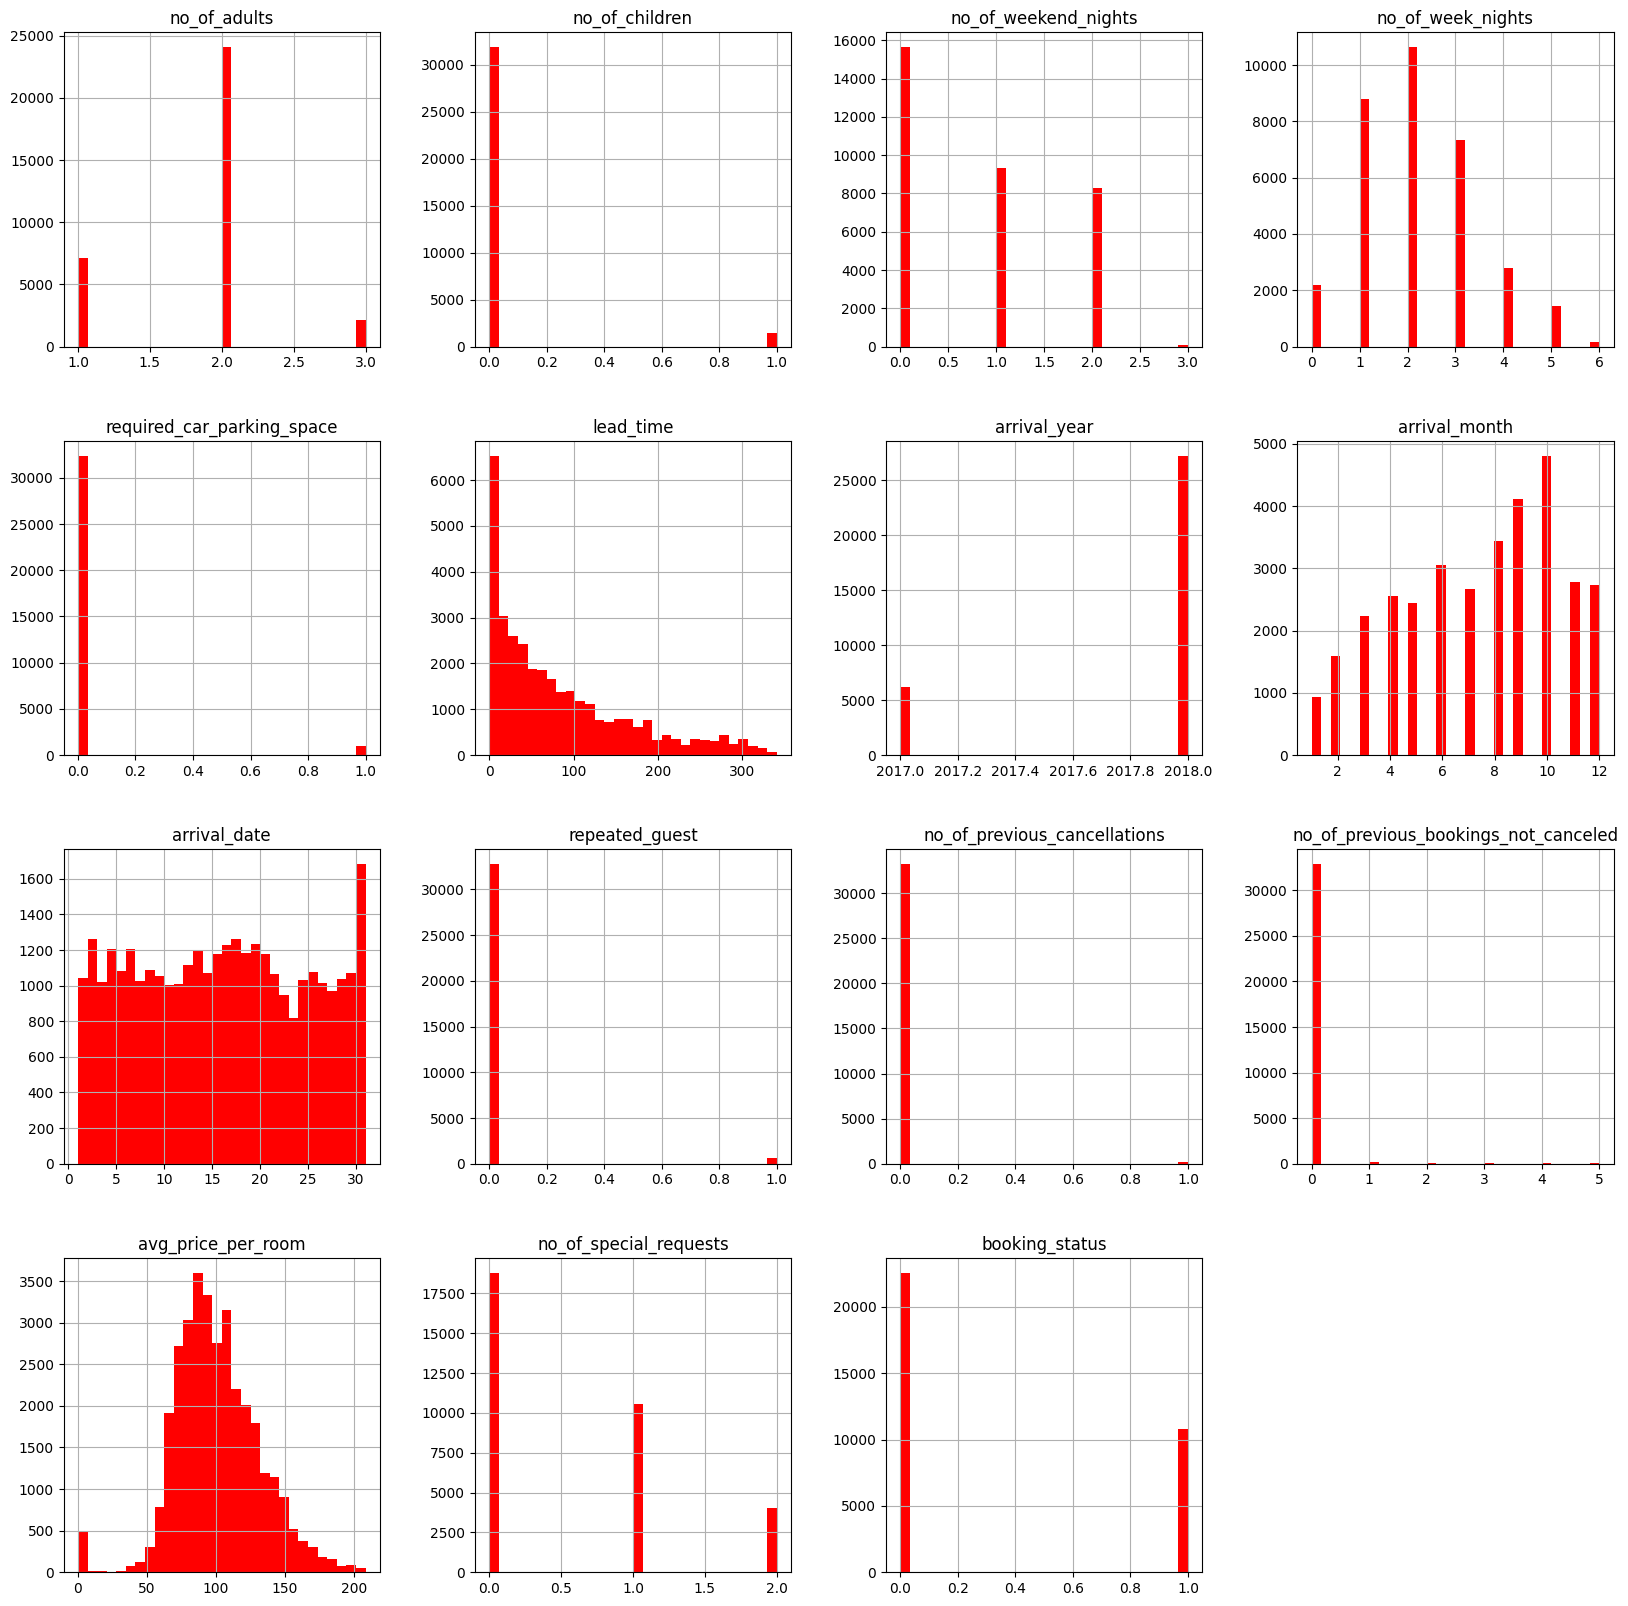

In [110]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [111]:
data_int = data.select_dtypes(include=['int', 'float'])
data_int

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,0,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,0,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,2.0,1.0,0,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,0,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,0,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,3.0,0.0,2.0,6.0,0,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,2.0,0.0,1.0,3.0,0,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,2.0,0.0,2.0,6.0,0,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,2.0,0.0,0.0,3.0,0,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


In [112]:
data_object = data.select_dtypes(include=['object'])
data_object = data_object.drop('Booking_ID', axis=1)
data_object

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
33339,Meal Plan 1,Room_Type 4,Online
33340,Meal Plan 1,Room_Type 1,Online
33341,Meal Plan 1,Room_Type 1,Online
33342,Not Selected,Room_Type 1,Online


In [113]:
onehotencoder = OneHotEncoder()
data_object = onehotencoder.fit_transform(data_object).toarray()
data_object.shape

(33344, 16)

In [114]:
feature_names = onehotencoder.get_feature_names_out()

data_object_name = pd.DataFrame(data_object, columns=feature_names)
data_object_name

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [115]:
data_all = pd.concat([data_object_name, data_int], axis = 1)
data_all

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

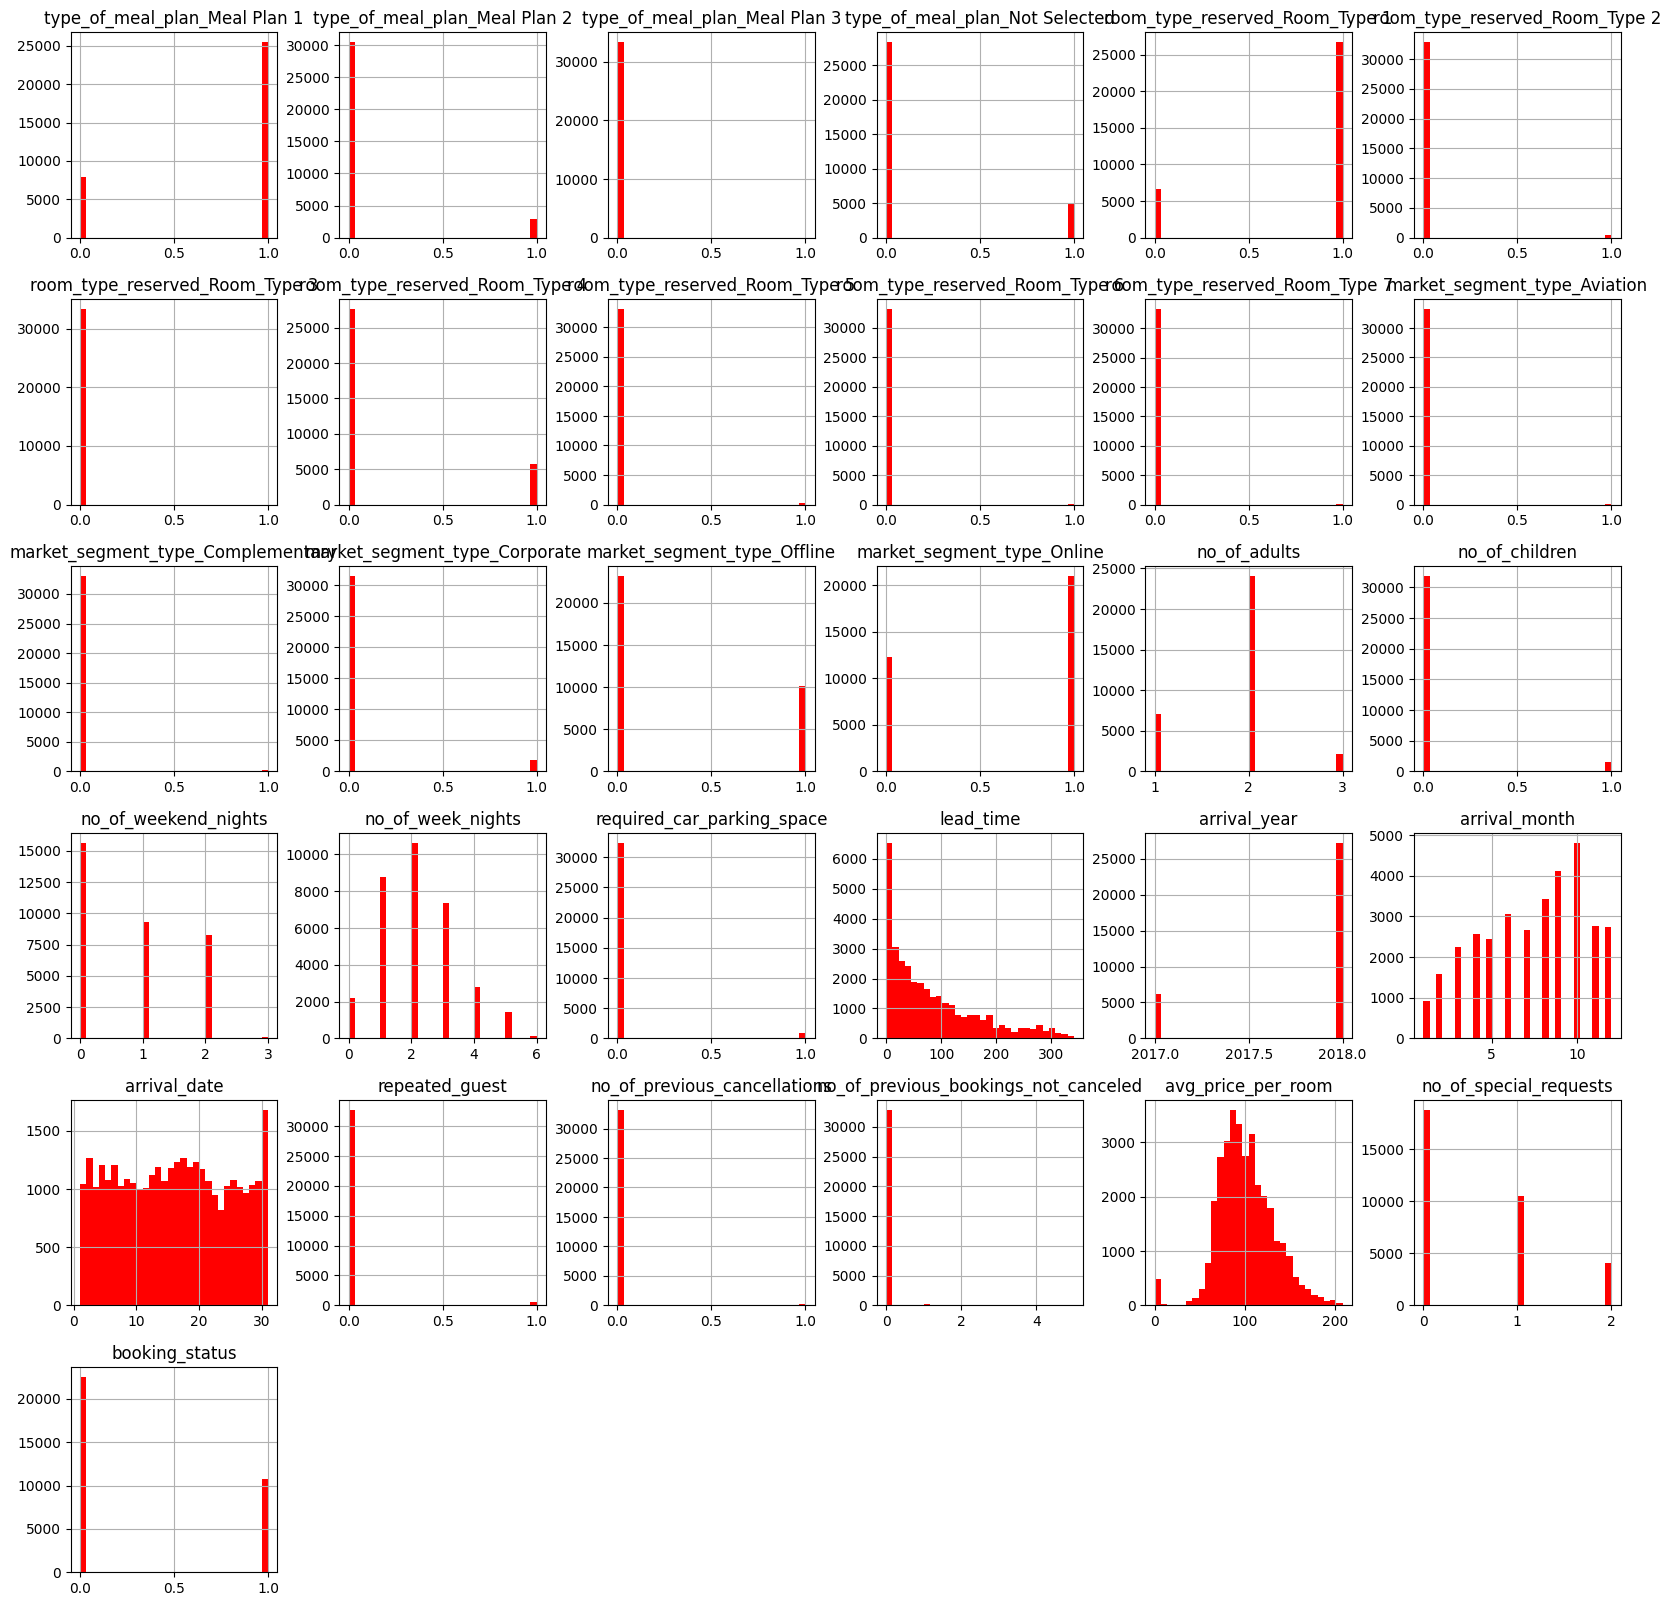

In [116]:
data_all.hist(bins = 30, figsize = (20,20), color = 'r')

In [117]:
X = data_all.drop('booking_status', axis=1)
y = data_all['booking_status']

In [118]:
# create a SMOTE object
smote = SMOTE()

# fit the SMOTE object to the data and oversample
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# combine the oversampled data into a new DataFrame
df_oversampled = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)
df_oversampled

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,224.000000,2017,10,2,0,0.0,0.0,65.000000,0.000000,0
1,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,5.000000,2018,11,6,0,0.0,0.0,106.680000,1.000000,0
2,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,1.000000,2018,2,28,0,0.0,0.0,60.000000,0.000000,1
3,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,211.000000,2018,5,20,0,0.0,0.0,100.000000,0.000000,1
4,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,48.000000,2018,4,11,0,0.0,0.0,94.500000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,...,95.000000,2018,10,20,0,0.0,0.0,132.300000,0.000000,1
45090,0.181994,0.0,0.0,0.818006,1.000000,0.0,0.0,0.000000,0.0,0.0,...,173.818006,2017,7,4,0,0.0,0.0,85.409003,0.000000,1
45091,0.830452,0.0,0.0,0.169548,0.169548,0.0,0.0,0.830452,0.0,0.0,...,183.169548,2018,7,15,0,0.0,0.0,104.994813,1.000000,1
45092,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,317.000000,2018,9,15,0,0.0,0.0,120.000000,0.000000,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

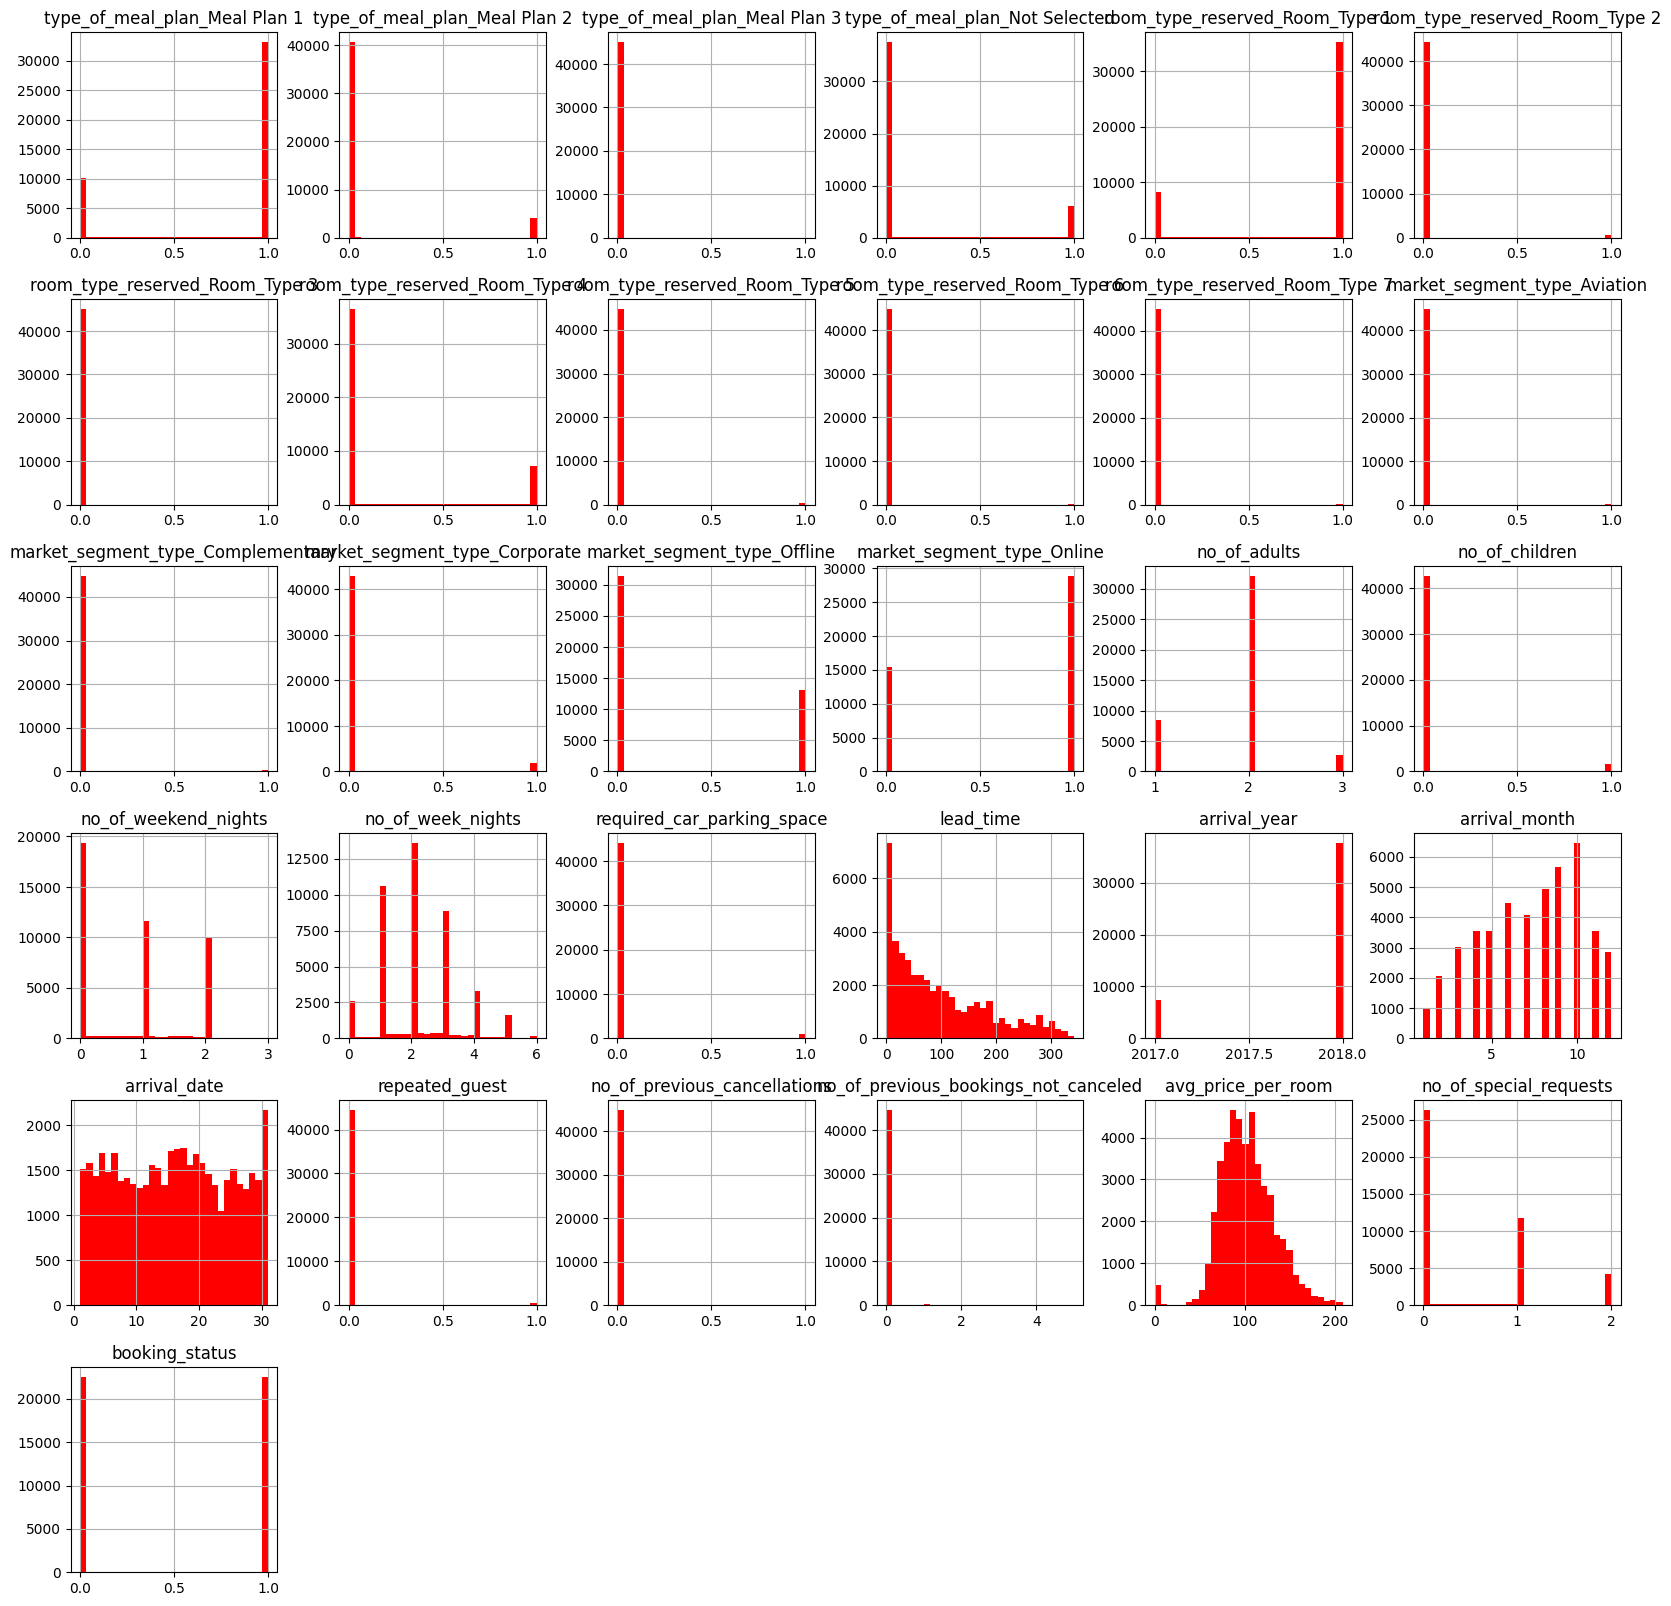

In [119]:
df_oversampled.hist(bins = 30, figsize = (20,20), color = 'r')

In [120]:
X = df_oversampled.drop('booking_status', axis=1)
y = df_oversampled['booking_status']